### Perceptron

1) Стадия инициализации (здесь задаются гиперпараметры)
2) Стадия обучения (изменение параметров)
3) Стадия предсказания (можем делать предсказание на новых моделях)

In [3]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np
import pandas as pd

In [9]:
def Loss(y_pred, y):
    '''
    Считаем среднеквадратическую ошибку
    '''
    y_pred = y_pred.reshape(-1,1)
    y = np.array(y).reshape(-1,1)
    
    return 0.5 * np.mean((y_pred - y) ** 2)

In [43]:
class Perceptron:
    def __init__(self, w=None, b=0):
        '''
        :param: w -- вектор весов
        :param: b -- смещение (свободный член)
        '''
        self.w = w
        self.b = b
        
    def activate(self, x):
        return np.array(x > 0, dtype=np.int64)
    
    def forward_pass(self, X):
        '''
        Эта функция расчитывает ответ перцептрона при предъявлении набора объектов
        :param: X -- матрица объектов размера (n,m), каждая строка - отдельный объект
        :return: вектор размера (n,1) из нулей и единиц с ответами перцептрона
        '''
        n = X.shape[0]
        y_pred = np.zeros((n,1))
        y_pred = self.activate(X @ self.w.reshape(X.shape[1], 1) + self.b)
        return y_pred.reshape(-1,1)
    
    def backward_pass(self, X, y, y_pred, learning_rate=0.005):
        '''
        Обновляет значение весов перцептрона в соответствии с этим объектом
        :param: X -- матрица объектов размера (n,m)
                y -- вектор правильных ответов(n,1)
                learning_rate - "скорость обучения" (символ alpha в формулах)
        В методе ничего не возвращается, только правильно меняются веса с помощью градиентного спуска
        '''
        n = len(y)
        y = np.array(y).reshape(-1,1)
        self.w = self.w - learning_rate * (X.T @ (y_pred - y) / n)
        self.b = self.b - learning_rate * np.mean(y_pred - y)
    
    def fit(self, X, y, num_epochs=300):
        '''
        Спускаемся в минимум
        :param: X -- матрица объектов размера (n,m)
                y -- вектор правильных ответов(n,1)
                num_epochs -- количество итераций обучения
        :return: losses -- вектор значений функции потерь
        '''
        self.w = np.zeros((X.shape[1],1)) # Столбец
        self.b = 0 # Смещение 
        losses = [] # Значение функции потерь на различных итерациях обновления весов
        
        for i in range(num_epochs):
            y_pred = self.forward_pass(X) # Предсказание с текущими весами
            losses.append(Loss(y_pred, y)) # Считаем функцию потерь с текущими весами
            self.backward_pass(X, y, y_pred)
        
        return losses

In [44]:
w = np.array([1.,2.]).reshape(2,1)
b = 2.
X = np.array([[1.,2.,-1], [3.,3.,-3.2]])

perceptron = Perceptron(w,b)
y_pred = perceptron.forward_pass(X.T)
print('y_pred = ' + str(y_pred))

y_pred = [[1]
 [1]
 [0]]


In [45]:
y = np.array([1,0,1]).reshape(3,1)

In [46]:
perceptron.backward_pass(X.T, y, y_pred)

print('w = ' + str(perceptron.w))
print('b = ' + str(perceptron.b))

w = [[0.995     ]
 [1.98966667]]
b = 2.0


In [47]:
df = pd.read_csv('apples_pears.csv')
df.head()

,yellowness,symmetry,target
0,0.779427,0.257305,1.0
1,0.777005,0.015915,1.0
2,0.977092,0.304210,1.0
3,0.043032,0.140899,0.0
4,0.760433,0.193123,1.0


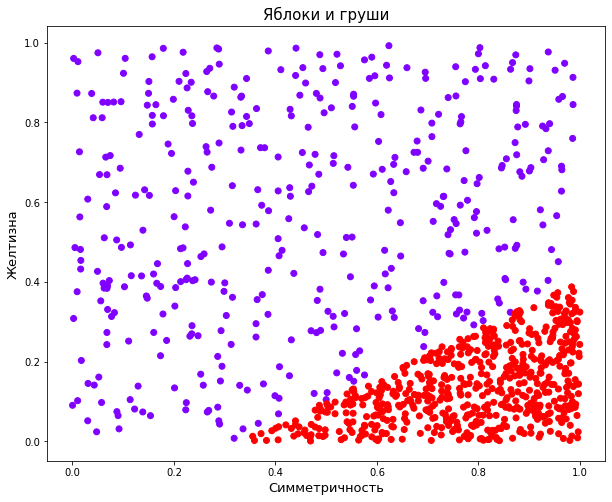

In [48]:
plt.figure(figsize=(10,8))
plt.scatter(df.iloc[:,0], df.iloc[:,1], c=df['target'], cmap='rainbow')
plt.title('Яблоки и груши', fontsize=15)
plt.xlabel('Симметричность', fontsize=13)
plt.ylabel('Желтизна', fontsize=13)
plt.show()

In [49]:
X = df.iloc[:,:2].values
y = df['target'].values.reshape((-1,1))

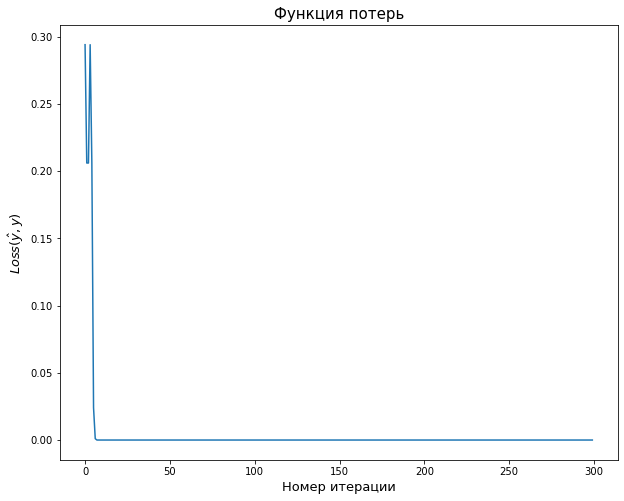

CPU times: total: 109 ms
Wall time: 101 ms


In [50]:
%%time

perceptron = Perceptron()
losses = perceptron.fit(X,y)

plt.figure(figsize=(10,8))
plt.plot(losses)
plt.title('Функция потерь', fontsize=15)
plt.xlabel('Номер итерации', fontsize=13)
plt.ylabel('$Loss(\hat{y}, y)$', fontsize=13)
plt.show()

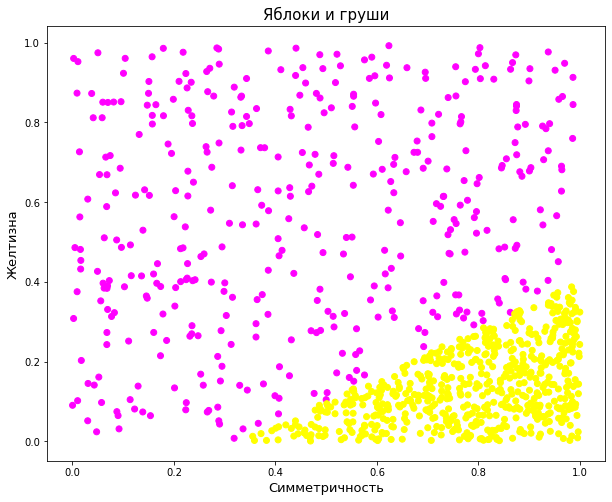

In [51]:
plt.figure(figsize=(10,8))
plt.scatter(df.iloc[:,0], df.iloc[:,1], c=perceptron.forward_pass(X).ravel(), cmap='spring')
plt.title('Яблоки и груши', fontsize=15)
plt.xlabel('Симметричность', fontsize=13)
plt.ylabel('Желтизна', fontsize=13)
plt.show()

In [52]:
from sklearn.linear_model import Perceptron as skPerceptron

In [53]:
df = pd.read_csv('voice.csv')
df['label'] = df['label'].apply(lambda x : 1 if x == 'male' else 0)
df.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,1
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,1
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,1
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,1
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,1


In [54]:
df = df.sample(frac=1)

In [55]:
X_train = df.iloc[:int(len(df)*.7), :-1]
y_train = df.iloc[:int(len(df)*.7), -1]

X_test = df.iloc[int(len(df)*.7):, :-1]
y_test = df.iloc[int(len(df)*.7):, -1]

In [56]:
perceptron = Perceptron()
perceptron.fit(X_train.values, y_train.values)

sk_perceptron = skPerceptron(random_state=42)
sk_perceptron.fit(X_train.values, y_train.values)

Perceptron(random_state=42)

In [59]:
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, precision_score, recall_score
print(f'Точность (доля правильных ответов, из 100%) нашего перцептрона:\
      {accuracy_score(y_test.values, perceptron.forward_pass(X_test))*100:.3f}')
print(f'Точность (доля правильных ответов, из 100%) нашего перцептрона:\
      {accuracy_score(y_test.values, sk_perceptron.predict(X_test))*100:.3f}')

Точность (доля правильных ответов, из 100%) нашего перцептрона:      49.106
Точность (доля правильных ответов, из 100%) нашего перцептрона:      71.714


C:\Users\gr486_srr\Anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but Perceptron was fitted without feature names
  warnings.warn(


In [60]:
perceptron = Perceptron()
perceptron.fit(X_train.values, y_train.values, num_epochs=5000)

sk_perceptron = skPerceptron(random_state=42, max_iter=5000)
sk_perceptron.fit(X_train.values, y_train.values,)

Perceptron(max_iter=5000, random_state=42)

In [61]:
print(f'Точность (доля правильных ответов, из 100%) нашего перцептрона:\
      {accuracy_score(y_test.values, perceptron.forward_pass(X_test))*100:.3f}')
print(f'Точность (доля правильных ответов, из 100%) нашего перцептрона:\
      {accuracy_score(y_test.values, sk_perceptron.predict(X_test))*100:.3f}')

Точность (доля правильных ответов, из 100%) нашего перцептрона:      73.396
Точность (доля правильных ответов, из 100%) нашего перцептрона:      71.714


C:\Users\gr486_srr\Anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but Perceptron was fitted without feature names
  warnings.warn(
